# Perform EDA on the raw data

In [10]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# set plotting style for the sns
sns.set(style='whitegrid')

In [11]:
# load the dataset
df=pd.read_csv('../data/labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## data overview

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [13]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

==> no missing values 

24783 row , and 6 columns

In [14]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
# let's drop the Unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [18]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [24]:
# class distribution 
df['class'].value_counts() # this one shows as encoded class 
#df[['hate_speech', 'offensive_language', 'neither']].sum() # this one shows as each class and it corresponding count ==> imply overlapping

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

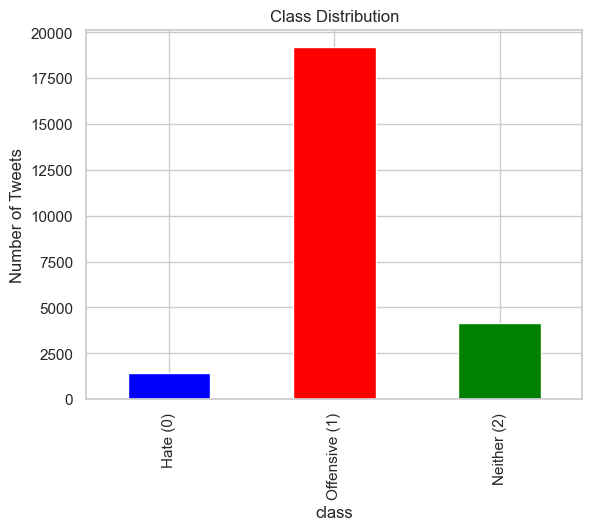

In [25]:
df['class'].value_counts().sort_index().plot(kind='bar', color=['blue', 'red', 'green'])
plt.xticks([0, 1, 2], ['Hate (0)', 'Offensive (1)', 'Neither (2)'])
plt.ylabel('Number of Tweets')
plt.title('Class Distribution')
plt.show()

<Axes: title={'center': 'Class Proportions (%)'}, ylabel='class_label'>

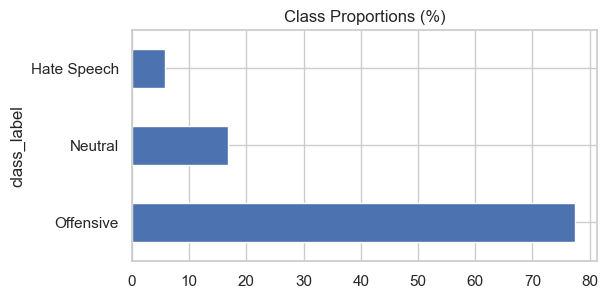

In [29]:
(df['class_label'].value_counts(normalize=True) * 100).plot(kind='barh', figsize=(6,3), title="Class Proportions (%)")

- class label for majority of CF users. 0 - hate speech     1 - offensive language     2 - neither
- our data is heavily unbalanced
- offensive language is the major class

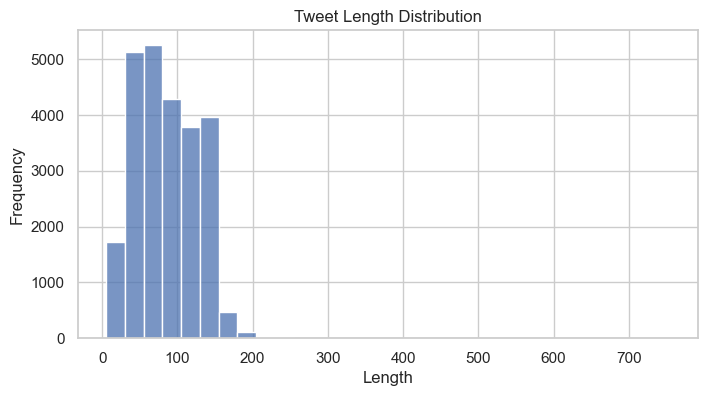

In [ ]:
# tweet lenght distribution 
df['text_length'] = df['tweet'].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=30)
plt.title('Tweet Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [28]:
# check for duplicates
duplicate_count = df.duplicated(subset='tweet').sum()
print(f'duplicate tweets : {duplicate_count}')

duplicate tweets : 0
